# Data Pre Processing

### TORCHVISION
The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision.

In [1]:
import torch 
import torchvision

from torchvision import transforms, datasets

### Train and Test Datasets

Handwritten digits from 0 to 9 

28 x 28 image

In [2]:
train = datasets.MNIST( "", 
                        train = True, 
                        download=True, 
                        transform=transforms.Compose(
                            [transforms.ToTensor()]
                                                    )
                      )

test = datasets.MNIST( "", 
                        train = False, 
                        download=True, 
                        transform=transforms.Compose(
                            [transforms.ToTensor()]
                                                    )
                      )

2.1%

100.0%


Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw


102.8%


Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw




16.7%

100.0%


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw



112.7%

Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw



In [9]:
# batches : How many samples at a time will be processed
# shuffle : Miw the data in each batch 
#           (in order to avoid only one label type in the batch)
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = 10)
testset  = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = 10)

In [5]:
# data will store "batch_size" images
for data in trainset: 
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

We can acces the training image and its label as ... 

In [19]:
n = 0
x, y = data[0][n], data[1][n]

print(x.shape)
print(y.shape)

torch.Size([1, 28, 28])
torch.Size([])


Visualizing the data ...

<function matplotlib.pyplot.show(close=None, block=None)>

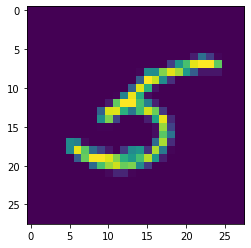

In [20]:
import matplotlib.pyplot as plt 

plt.imshow(x.view(28,28))
plt.show


Is the data balanced ?

In [22]:
total = 0 
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset: 
    Xs, ys = data
    for y in ys: 
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


We can say it is balanced ... 

In [23]:
for i in counter_dict:
    print(f'{i} : {counter_dict[i]/total*100}')

0 : 9.871666666666666
1 : 11.236666666666666
2 : 9.93
3 : 10.218333333333334
4 : 9.736666666666666
5 : 9.035
6 : 9.863333333333333
7 : 10.441666666666666
8 : 9.751666666666667
9 : 9.915000000000001
